# Content-Based Filtering Recommendation Systems

## Basics of Recommendation Systems


Recommendation systems or recommender systems are one of the most successful and widespread application of machine learning techniques in business. You can find large scale recommender systems in retail, video on demand, or music streaming.

* help to increase the site’s page views, dwell time, click-through rate, and retention

* help generate more advertising revenue

* increase upselling and crossselling

**Examples of recommendation systems are:**

* offer customers of an on-line retailer suggestions about what they might want to buy, based on their past history of purchases and/or product searches, e.g., Amazon


* offer on-line contents to  viewers or readers, based on a prediction of customers' interests, e.g., TikTok, YouTube, News


* recommending movies to user based on their previous watch, e.g., Netflix, see also [Netflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize) 

<img src="https://raw.githubusercontent.com/jalajthanaki/Movie_recommendation_engine/master/img/2_2.png" 
align="middle" alt="Figure 2.2" data-canonical-src="" style="width:100%;height:100%">

<img src="https://raw.githubusercontent.com/jalajthanaki/Movie_recommendation_engine/master/img/2_4.png" 
align="middle" alt="Figure 2.4" data-canonical-src="" style="width:80%;height:80%">




Two main approaches to the design of recommender systems are **content-based filtering** and **collaborative filtering**. 

* Content-Based Filtering is used to produce items recommendation based on items’ characteristics.

* Collaborative filtering produces recommendations based on the knowledge of users’ attitude such as ratings, towards items.

## MovieLens Dataset

We will use the famous [MovieLens dataset (small)](https://grouplens.org/datasets/movielens), which is one of the most popular datasets used when implementing and testing recommender systems. It contains ~100,000 ratings from ~600 users on ~9700 movies. **None of the users has rated on all movies.**


![](https://md.ekstrandom.net/talks/2014/txstate-recsys-research/movielens.png)

## Import Libraries 

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [49]:
# Reading ratings file
ratings = pd.read_csv('ratings.csv', sep=',', encoding='latin-1', usecols=['userId','movieId','rating','timestamp'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep=',', encoding='latin-1', usecols=['movieId','title','genres'])

In [50]:
df_movies = movies
df_ratings = ratings

## Exploratory Data Analysis(EDA)

In [51]:
df_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [53]:
df_movies.tail(10)

,movieId,title,genres
9732,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
9733,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama
9734,193571,Silver Spoon (2014),Comedy|Drama
9735,193573,Love Live! The School Idol Movie (2015),Animation
9736,193579,Jon Stewart Has Left the Building (2015),Documentary
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [54]:
print('There are ' + str(df_movies.movieId.nunique()) + ' movies.')

There are 9742 movies.


In [55]:
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [8]:
print('There are ' + str(df_ratings.userId.nunique()) + ' users.')

There are 610 users.


In [56]:
print('There are ' + str(df_ratings.shape[0]) + ' ratings.')

There are 100836 ratings.


### Most popular genres of movie released

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9742, dtype: object


<BarContainer object of 19 artists>

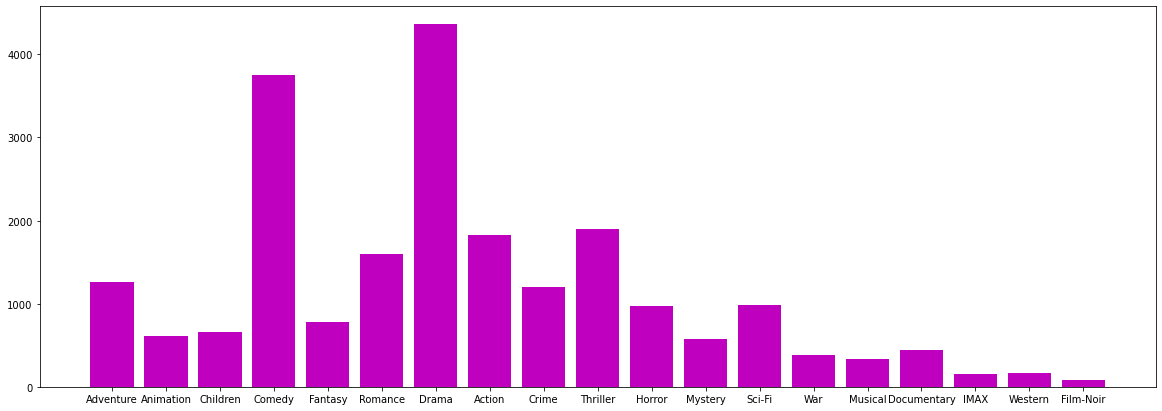

In [57]:
plt.figure(figsize=(20,7))
generlist = df_movies['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
print(generlist)

geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='m')

In [58]:
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


### Distribution of users rating

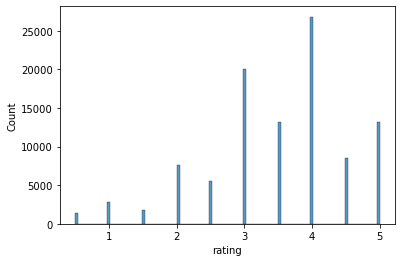

In [59]:
sns.histplot(df_ratings["rating"]);

In [13]:
print("Shape of frames: \n"+ " Rating DataFrame"+ str(df_ratings.shape)+"\n Movies DataFrame"+ str(df_movies.shape))

Shape of frames: 
 Rating DataFrame(100836, 4)
 Movies DataFrame(9742, 3)


In [60]:
merge_ratings_movies = pd.merge(df_movies, df_ratings, on='movieId', how='inner')

In [62]:
merge_ratings_movies.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,962685262
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616


In [63]:
merge_ratings_movies.drop('timestamp', axis=1, inplace = True)
merge_ratings_movies.head(10)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0


In [64]:
merge_ratings_movies.shape

(100836, 5)

**Group the ratings based on users**

In [25]:
ratings_grouped_by_users = merge_ratings_movies[['userId','rating']].groupby('userId').agg([np.size, np.mean])


In [26]:
ratings_grouped_by_users.head(10)

rating          
         size      mean
userId                 
1         232  4.366379
2          29  3.948276
3          39  2.435897
4         216  3.555556
5          44  3.636364
6         314  3.493631
7         152  3.230263
8          47  3.574468
9          46  3.260870
10        140  3.278571

### Top 10 users who have rated most of the movies

<AxesSubplot:xlabel='userId'>

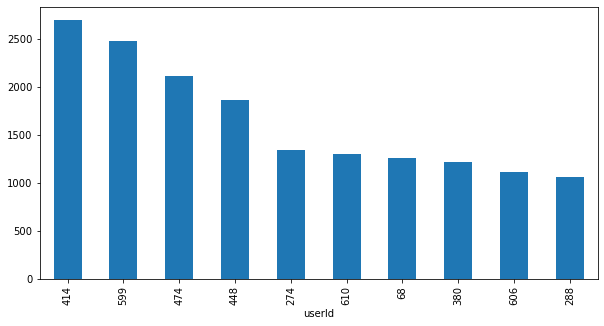

In [65]:
ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(10).plot(kind = 'bar', figsize = (10,5))


In [66]:
ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(10)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: size, dtype: int64

In [67]:
ratings_grouped_by_movies = merge_ratings_movies[['movieId', 'rating']].groupby('movieId').agg([np.mean, np.size])

In [68]:
ratings_grouped_by_movies.shape

(9724, 2)

In [69]:
ratings_grouped_by_movies.head(10)

rating     
             mean size
movieId               
1        3.920930  215
2        3.431818  110
3        3.259615   52
4        2.357143    7
5        3.071429   49
6        3.946078  102
7        3.185185   54
8        2.875000    8
9        3.125000   16
10       3.496212  132

### Movies with high average rating

movieId
88448     5.0
100556    5.0
143031    5.0
143511    5.0
143559    5.0
6201      5.0
102217    5.0
102084    5.0
6192      5.0
145994    5.0
Name: mean, dtype: float64


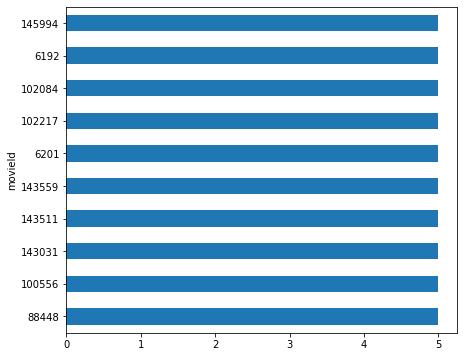

In [73]:
sorted_ratings_top10 = ratings_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10)
print(sorted_ratings_top10)

sorted_ratings_top10.plot(kind='barh', figsize=(7,6));

In [75]:
df_movies.loc[df_movies['movieId'] == 88448]

,movieId,title,genres
7656,88448,Paper Birds (PÃ¡jaros de papel) (2010),Comedy|Drama


### Movies with low average rating

In [76]:
low_rated_movies_filter = ratings_grouped_by_movies['rating']['mean']< 1.5

In [77]:
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]

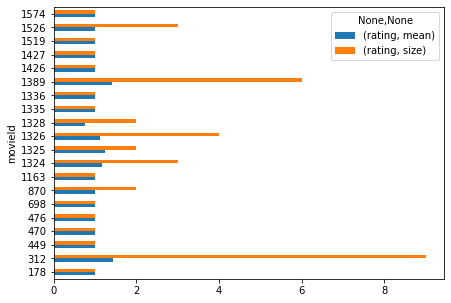

In [78]:
low_rated_movies.head(20).plot(kind='barh', figsize=(7,5));

In [79]:
low_rated_movies.head(10)

rating     
             mean size
movieId               
178      1.000000    1
312      1.444444    9
449      1.000000    1
470      1.000000    1
476      1.000000    1
698      1.000000    1
870      1.000000    2
1163     1.000000    1
1324     1.166667    3
1325     1.250000    2

In [81]:
print(low_rated_movies)

           rating     
             mean size
movieId               
178      1.000000    1
312      1.444444    9
449      1.000000    1
470      1.000000    1
476      1.000000    1
...           ...  ...
184641   0.500000    1
189547   1.000000    1
190213   1.000000    1
190219   1.000000    1
190221   1.000000    1

[296 rows x 2 columns]


In [82]:
df_movies.loc[df_movies['movieId'] == 312]

,movieId,title,genres
271,312,Stuart Saves His Family (1995),Comedy


## Content-based Filtering

Content-based filtering methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user. 

* Recommendation of items are based on: user's previous purcheses, views and likes

* Generate **similarity** score from item atrributes. Here we use movie genres.

* Recommend the items based on similarity score

For example, if a user likes movies such as ‘Mission Impossible’ then we can recommend him the movies with the genre ‘Action’.


#### Term Frequency-Inverse Document Frequency (TF-IDF)
The concepts of Term Frequency (TF) and Inverse Document Frequency (IDF) are used in information retrieval systems and also content based filtering mechanisms (such as a content based recommender). They are used to determine the relative importance of a document / article / news item / movie etc.

<img src='https://mungingdata.files.wordpress.com/2017/11/equation.png?w=430&h=336'>


We will consider genres as an important parameter to recommend user the movie he or she watches based on generes of movie user has already watched.

#### Cosine Similarity

For calculating similarity/distance, many similarity coefficients can be calculated. Most widely used similarity coefficients are Euclidean, Cosine, Pearson Correlation etc. We will use cosine similarity here.


<img src="https://raw.githubusercontent.com/jalajthanaki/Movie_recommendation_engine/master/img/2_14.png" 
align="middle" alt="Figure 2.14" data-canonical-src="" style="width:60%;height:60%">

* cosine similarity value `[-1,1]` 
* particularly used in positive space, where the outcome is neatly bounded in `[0,1]`
* very efficient to evaluate, especially for sparse vectors.

| Value of $\cos\theta$ | Value of $\theta$ | Conclusion|
|:---:|:---: |:---:|
| +1 |$0^{\circ}$   | Vectors are very similar |
|  0 |$90^{\circ}$  | Vectors are not similar (orthogonal vectors)|
| -1 |$180^{\circ}$ | Vectors are diametrically dissimilar |

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
# Define a TF-IDF Vectorizer Object.
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

#Replace NaN with an empty string
df_movies['genres'] = df_movies['genres'].replace(to_replace="(no genres listed)", value="")

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_movies_genres_matrix = tfidf_movies_genres.fit_transform(df_movies['genres'])

print(tfidf_movies_genres.get_feature_names())

print(tfidf_movies_genres_matrix.shape)


['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'imax', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
(9742, 19)


/Users/py253733/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [83]:
print(tfidf_movies_genres_matrix[0][0])

  (0, 8)	0.482990142708577
  (0, 4)	0.26758647689140014
  (0, 3)	0.5048454681396087
  (0, 2)	0.5162254711770092
  (0, 1)	0.41684567364693936


In [47]:
df_movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [84]:
print(tfidf_movies_genres_matrix)

  (0, 8)	0.482990142708577
  (0, 4)	0.26758647689140014
  (0, 3)	0.5048454681396087
  (0, 2)	0.5162254711770092
  (0, 1)	0.41684567364693936
  (1, 8)	0.5936619434123594
  (1, 3)	0.620525172745643
  (1, 1)	0.5123612074824268
  (2, 14)	0.8210088907493954
  (2, 4)	0.5709154064399099
  (3, 7)	0.46640480307738325
  (3, 14)	0.726240982959826
  (3, 4)	0.5050154397005037
  (4, 4)	1.0
  (5, 16)	0.5420423542868653
  (5, 5)	0.6359470441562756
  (5, 0)	0.5493281743985542
  (6, 14)	0.8210088907493954
  (6, 4)	0.5709154064399099
  (7, 3)	0.7711121633813997
  (7, 1)	0.6366993258087036
  (8, 0)	1.0
  (9, 16)	0.5457299419583338
  (9, 0)	0.5530653284926609
  (9, 1)	0.6295217016667962
  :	:
  (9731, 15)	0.5912169125932074
  (9731, 0)	0.47946635727353987
  (9731, 4)	0.3503331832902893
  (9731, 1)	0.5457483258721835
  (9732, 15)	0.5491808953132112
  (9732, 0)	0.4453758980017919
  (9732, 4)	0.32542420076143624
  (9732, 2)	0.6278054979536716
  (9733, 7)	0.43179372819853856
  (9733, 2)	0.9019723811117537
  (9

**Compute the cosine similarity matrix**

Let
$\mathbf{G} = 
\begin{bmatrix}
— g_1^\top — \\
— g_2^\top — \\
\dots \\
— g_{9742}^\top — 
\end{bmatrix}\in\mathbb{R}^{9742\times19}$ be the move genres matrix after TF-IDF vectorization, with each row $g_i^\top$ being the TF-IDF vector for the $i$-th movie's genres, then the cosine similarity matrix $\mathbf{C}\in\mathbb{R}^{9742\times9742}$ is conveniently computed by

$$
C_{i,j} = \frac{\langle g_i, g_j \rangle}{\|g_i\| \|g_j\|},
$$

representing the cosine similarity between $g_i$ and $g_j$, i.e., $i$-th and $j$-th movies' genres.

The cosine similarity matrix $\mathbf{C}$ is symmetric, and the $i$-th row or coloumn gives the cosine similarities between the $i$-th movie's genres and all movies' genres (including itself).

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_movies = cosine_similarity(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix)

print(cosine_sim_movies.shape)

(9742, 9742)


**Recommend new movies that are similar to a movie based on genres**

In [108]:
def get_recommendations_based_on_genres(movie_title, n_recommendations = 2, cosine_sim_movies=cosine_sim_movies):
    """
    Calculates top 2 movies to recommend based on given movie titles genres. 
    :param movie_title: title of movie to be taken for base of recommendation
    :param cosine_sim_movies: cosine similarity between movies 
    :return: Titles of movies recommended to user
    """
    
    # Get the index of the movie that matches the title
    idx_movie = df_movies.loc[df_movies['title'].isin([movie_title])]
    
    idx_movie = idx_movie.index
    
    
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
            
    
    # Sort the movies based on the similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)
    
    
    
    # Get the indices of of the most similar movies
    movie_indices = []
    
    i = 0
    
    # Return the most similar movies
    
    while len(movie_indices) < n_recommendations:
        if sim_scores_movies[i][0]!=idx_movie:
            movie_indices.append(sim_scores_movies[i][0])
        i += 1


    return df_movies.iloc[movie_indices]['title']

In [109]:
get_recommendations_based_on_genres("Toy Story (1995)", n_recommendations = 5)

1706                                       Antz (1998)
2355                                Toy Story 2 (1999)
2809    Adventures of Rocky and Bullwinkle, The (2000)
3000                  Emperor's New Groove, The (2000)
3568                             Monsters, Inc. (2001)
Name: title, dtype: object

In [110]:
get_recommendations_based_on_genres('Harry Potter and the Chamber of Secrets (2002)', n_recommendations = 5)

1598                             Dark Crystal, The (1982)
2157                                     Excalibur (1981)
2845               Sinbad and the Eye of the Tiger (1977)
3638    Lord of the Rings: The Fellowship of the Ring,...
4137        Lord of the Rings: The Two Towers, The (2002)
Name: title, dtype: object

In [111]:
get_recommendations_based_on_genres('Looper (2012)', n_recommendations = 5)

145                   Judge Dredd (1995)
6106    District 13 (Banlieue 13) (2004)
8915                Suicide Squad (2016)
8982                  Tokyo Tribe (2014)
2249                    RoboCop 2 (1990)
Name: title, dtype: object

**Recommend new movies that are similar to the movies a user has watched**

In [112]:
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


Find ratings from user wirh userId = 2

In [113]:
df_rating_filtered = df_ratings[df_ratings["userId"]== 2]
df_rating_filtered

,userId,movieId,rating,timestamp
232,2,318,3.0,1445714835
233,2,333,4.0,1445715029
234,2,1704,4.5,1445715228
235,2,3578,4.0,1445714885
236,2,6874,4.0,1445714952
237,2,8798,3.5,1445714960
238,2,46970,4.0,1445715013
239,2,48516,4.0,1445715064
240,2,58559,4.5,1445715141
241,2,60756,5.0,1445714980


In [117]:
def get_recommendation_content_model(userId, n_recommendations = 2):
    """
    Calculates top movies to be recommended to user based on movie user has watched.  
    :param userId: userid of user
                   n_recommendations: number of similar recommendations for each watched movie
    :return: List of titles of movies recommended to user
    """
    
    recommended_movie_list = []
    movie_list = []
    
    # find the ratings for userId
    df_rating_filtered = df_ratings[df_ratings["userId"]== userId]
    
    for key, row in df_rating_filtered.iterrows():
        movie_list.append( (df_movies["title"][row["movieId"]==df_movies["movieId"]]).values ) 
    

    for index, movie in enumerate(movie_list):
        for key, movie_recommended in get_recommendations_based_on_genres(movie[0], n_recommendations).iteritems():
            recommended_movie_list.append(movie_recommended)

     # removing already watched movies from recommended list    
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    
    return set(recommended_movie_list)

In [118]:
get_recommendation_content_model(userId=1)

{'101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '39 Steps, The (1935)',
 'Adventures in Babysitting (1987)',
 'Aladdin (1992)',
 'Alamo, The (1960)',
 'Alien Nation (1988)',
 'Amateur (1994)',
 'Amazing Panda Adventure, The (1995)',
 'Antz (1998)',
 'Apocalypse Now (1979)',
 'Aristocats, The (1970)',
 'Around the World in 80 Days (1956)',
 'Assassins (1995)',
 'Austin Powers: The Spy Who Shagged Me (1999)',
 'BURN-E (2008)',
 'Babes in Toyland (1934)',
 'Backbeat (1993)',
 'Balto (1995)',
 'Barb Wire (1996)',
 'Barbarella (1968)',
 'Batman: Mystery of the Batwoman (2003)',
 'Beat the Devil (1953)',
 'Before and After (1996)',
 'Ben-Hur (1959)',
 'Beverly Hills Cop III (1994)',
 'Big Bully (1996)',
 'Big Country, The (1958)',
 'Black Hole, The (1979)',
 'Blues Brothers 2000 (1998)',
 'Boot, Das (Boat, The) (1981)',
 'Bride of Frankenstein, The (Bride of Frankenstein) (1935)',
 'Broken Arrow (1996)',
 'Brothers Bloom, The (2008)',
 "Bug's Life, A (1998)",
 'Captain Blood (193

In [119]:
get_recommendation_content_model(userId=10)

{'300: Rise of an Empire (2014)',
 'Aladdin and the King of Thieves (1996)',
 'Alice in Wonderland (2010)',
 'Along Came a Spider (2001)',
 'American President, The (1995)',
 'American Tail, An (1986)',
 'Apollo 13 (1995)',
 'Around the World in 80 Days (1956)',
 'Assassins (1995)',
 'Asterix and Cleopatra (AstÃ©rix et ClÃ©opÃ¢tre) (1968)',
 'Babes in Toyland (1934)',
 'Batman Forever (1995)',
 'Beauty and the Beast (1991)',
 'Ben-Hur (1959)',
 'Beowulf & Grendel (2005)',
 'Big Bully (1996)',
 'Blood and Chocolate (2007)',
 'Bolt (2008)',
 'Broken Arrow (1996)',
 "Bug's Life, A (1998)",
 'Captain Horatio Hornblower R.N. (1951)',
 'Cinderella (1950)',
 'Cloud Atlas (2012)',
 'Corpse Bride (2005)',
 'Crossing Guard, The (1995)',
 'Dark Crystal, The (1982)',
 'Dark Knight, The (2008)',
 'Doom Generation, The (1995)',
 "Dracula (Bram Stoker's Dracula) (1992)",
 "Dragon Ball: Sleeping Princess in Devil's Castle (Doragon bÃ´ru: MajinjÃ´ no nemuri hime) (1987)",
 'Dragon Ball: The Curse Of Th

## Exercise: improvement using ratings

Modify the code so that content-based filtering only recommends movies similar to a user's top 5 or 10 favorate movies that he has watched based on his **ratings**.

In [120]:
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


Find ratings from user wirh userId = 2

In [121]:
df_rating_filtered = df_ratings[df_ratings["userId"]== 2]
df_rating_filtered.sort_values(by = 'rating', ascending=False, inplace =True)
df_rating_filtered

/var/folders/r_/k3h6lwv14rgc3xy2gxtsnjyd1_8f0t/T/ipykernel_21310/2643597145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_filtered.sort_values(by = 'rating', ascending=False, inplace =True)


,userId,movieId,rating,timestamp
260,2,131724,5.0,1445714851
259,2,122882,5.0,1445715272
254,2,106782,5.0,1445714966
250,2,89774,5.0,1445715189
241,2,60756,5.0,1445714980
248,2,80906,5.0,1445715172
234,2,1704,4.5,1445715228
240,2,58559,4.5,1445715141
242,2,68157,4.5,1445715154
247,2,80489,4.5,1445715340


In [122]:
df_rating_filtered = df_rating_filtered.head(5)
df_rating_filtered

,userId,movieId,rating,timestamp
260,2,131724,5.0,1445714851
259,2,122882,5.0,1445715272
254,2,106782,5.0,1445714966
250,2,89774,5.0,1445715189
241,2,60756,5.0,1445714980


In [123]:
def get_recommendation_content_model(userId, n_favorate = 5, n_recommendations = 2):
    """
    Calculates top movies to be recommended to user based on movie user has watched.  
    :param userId: userid of user
           n_favorate: number of top favorate movies which are recommendded for
           n_recommendations: number of similar recommendations for each selected movie
    :return: List of titles of movies recommended to user
    """
    
    recommended_movie_list = []
    movie_list = []
    
    # find the top ratings for userId
    df_rating_filtered = df_ratings[df_ratings["userId"]== userId]
    
    # sort the ratings to retrieve top favorate movies
    df_rating_filtered.sort_values(by = 'rating', ascending=False, inplace =True)
    df_rating_filtered = df_rating_filtered.head(n_favorate)

    for key, row in df_rating_filtered.iterrows():
        movie_list.append((df_movies["title"][row["movieId"]==df_movies["movieId"]]).values) 
    

    for index, movie in enumerate(movie_list):
        for key, movie_recommended in get_recommendations_based_on_genres(movie[0], n_recommendations).iteritems():
            recommended_movie_list.append(movie_recommended)

     # removing already watched movies from recommended list    
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    
    return set(recommended_movie_list)

In [124]:
get_recommendation_content_model(userId=1, n_favorate = 10)

/var/folders/r_/k3h6lwv14rgc3xy2gxtsnjyd1_8f0t/T/ipykernel_21310/2750428138.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_filtered.sort_values(by = 'rating', ascending=False, inplace =True)


{'101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 'Apocalypse Now (1979)',
 'Backbeat (1993)',
 'Balto (1995)',
 'Braveheart (1995)',
 'Broken Arrow (1996)',
 'Dark Crystal, The (1982)',
 "Eight Crazy Nights (Adam Sandler's Eight Crazy Nights) (2002)",
 'Farinelli: il castrato (1994)',
 'GoldenEye (1995)',
 'Leaving Las Vegas (1995)',
 'Meet the Feebles (1989)',
 'Phantom, The (1996)',
 'Quest, The (1996)',
 'Sense and Sensibility (1995)',
 'Sinbad and the Eye of the Tiger (1977)',
 'To Be or Not to Be (1942)',
 'Underground (1995)'}